<a href="https://colab.research.google.com/github/Roya62/sentiment-analysis/blob/main/Exploration_second_dataset-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/content/Bigtech  twitter sentiment.csv')


In [10]:
data.isnull().sum()

created_at           0
file_name            0
followers            0
friends              0
group_name           0
location         69689
retweet_count        0
screenname           0
search_query         0
text                 0
twitter_id           0
username             4
polarity             0
partition_0          0
partition_1          0
dtype: int64

In [13]:
data = pd.read_csv('/content/Bigtech  twitter sentiment.csv')[['text','polarity']]
data = data.drop_duplicates()
data = data.dropna().reset_index(drop = True)
data.columns = ['text','sentiment']

In [14]:
data['sentiment'] = data['sentiment'].apply(lambda a:1 if a>0.8 else -1 if a<-0.8 else a)

data = data[(data.sentiment==0) | (data.sentiment==1) | (data.sentiment==-1)]
data = data.reset_index(drop=True)

data['sentiment'].value_counts()

 0.0    98225
 1.0    17646
-1.0     2692
Name: sentiment, dtype: int64

In [15]:
for i in range(len(data.sentiment)):
    if data.sentiment[i] == -1.0	:
        data["sentiment"][i] = "negative"
    elif data.sentiment[i] == 0.0	:
        data["sentiment"][i] = "neutral"
    else:
        data["sentiment"][i] = "positive"
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


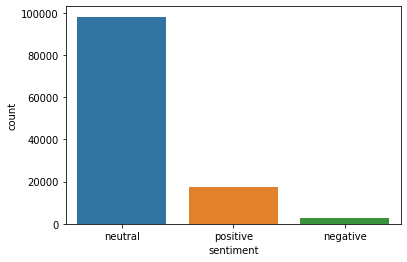

In [16]:
sns.countplot(data["sentiment"]);

In [17]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 20070421 words in the combination of all review.


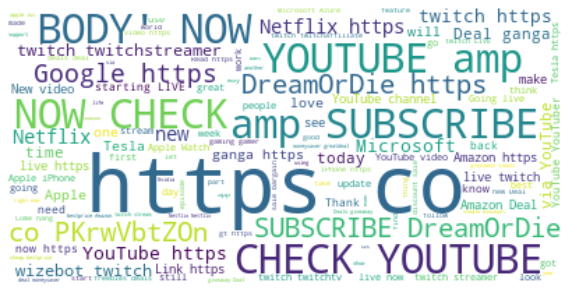

In [18]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
data.iloc[1].text

'#NVIDIA delays launch of #GeForce RTX 3070 until end of October https://t.co/5Jznv1aJkd https://t.co/uz0uGXbTQj'

In [20]:
data.iloc[5].text

'#BullSequana X2415, the first #supercomputer blade server in Europe to integrate #NVIDIA’s Ampere next-generation graphics processing unit architecture, the NVIDIA A100 Tensor Core #GPU s.  Read more ▶ https://t.co/adz4SqvtO0 Atos is sponsor at #Nvidia #GTC20 Digital https://t.co/6NrLt4sfPU'

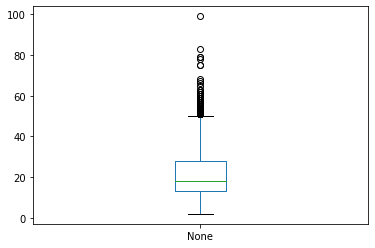

In [21]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in data['text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

In [22]:
import plotly.express as px
fig = px.pie(data, names='sentiment', title ='Pie chart of different sentiments of tweets')
fig.show()

In [23]:
def remove_chars():
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|#[a-zA-Z]+|$[a-zA-Z]+|@[a-zA-Z]+|[,.^_$*%-;鶯!?:]')
    for i in range(len(data["text"])):
        data["text"][i] = pattern.sub('', data["text"][i])
remove_chars()

data.head()

,text,sentiment
0,X the first blade server in Europe to integr...,neutral
1,delays launch of RTX until end of October,neutral
2,X the first blade server in Europe to integr...,neutral
3,X the first blade server in Europe to integr...,neutral
4,X the first blade server in Europe to integr...,neutral


In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
data_test = data.copy()
stop = stopwords.words('english')
data_test["text"] = data_test["text"].str.lower().str.split()
data_test["text"] = data_test["text"].apply(lambda x: [item for item in x if item not in stop])
data_test.head()

,text,sentiment
0,"[x, first, blade, server, europe, integrate, ’...",neutral
1,"[delays, launch, rtx, end, october]",neutral
2,"[x, first, blade, server, europe, integrate, ’...",neutral
3,"[x, first, blade, server, europe, integrate, ’...",neutral
4,"[x, first, blade, server, europe, integrate, ’...",neutral


In [27]:
def concate_words(data):
    for i in range(len(data)):
        #print(train_data.iloc[i])
        data.iloc[i] = " ".join(data.iloc[i])
    return data

data_test["text"] = concate_words(data_test["text"])

In [33]:
data.head()

,text,sentiment,length
0,X the first blade server in Europe to integr...,neutral,30
1,delays launch of RTX until end of October,neutral,8
2,X the first blade server in Europe to integr...,neutral,30
3,X the first blade server in Europe to integr...,neutral,30
4,X the first blade server in Europe to integr...,neutral,30


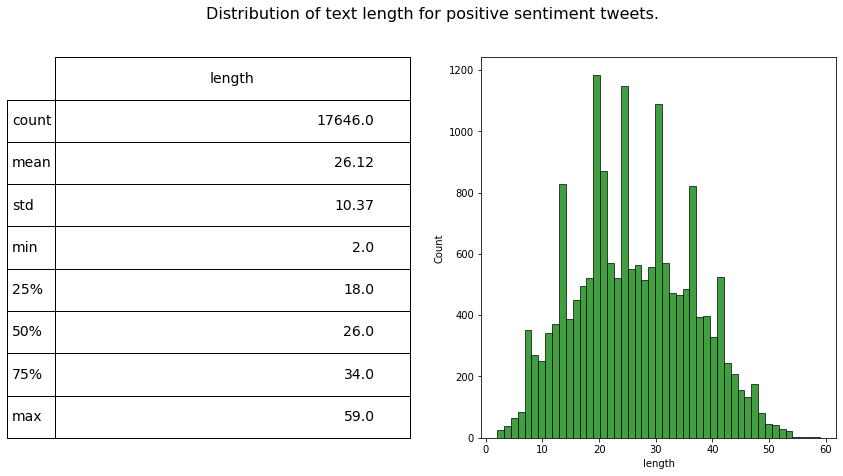

In [30]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['sentiment']=='positive']['length'], ax=ax1,color='green')
describe = data.length[data.sentiment=='positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

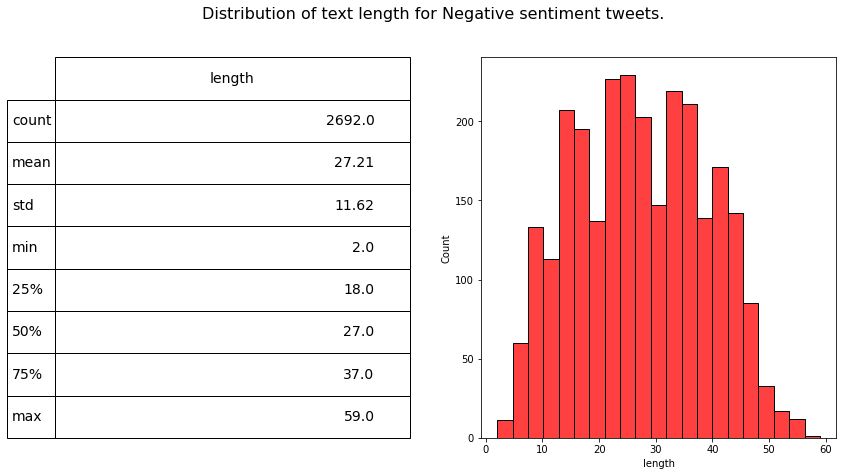

In [31]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['sentiment']=='negative']['length'], ax=ax1,color='red')
describe = data.length[data.sentiment=='negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

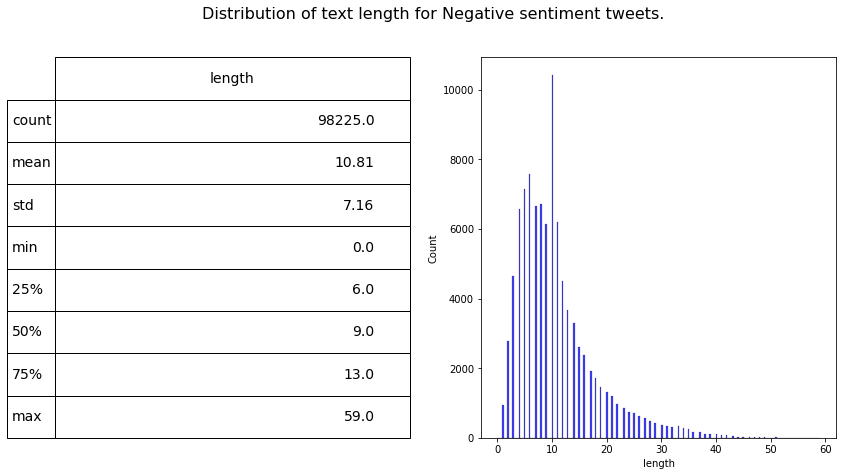

In [32]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['sentiment']=='neutral']['length'], ax=ax1,color='blue')
describe = data.length[data.sentiment=='neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

In [34]:
df = pd.read_csv('/content/Bigtech  twitter sentiment.csv')


In [6]:
data = pd.read_csv('/content/Bigtech  twitter sentiment.csv')[['text','polarity', 'group_name']]
data = data.drop_duplicates()
data = data.dropna().reset_index(drop = True)
data.columns = ['text','sentiment', 'group_name']

In [8]:
data.head()

,text,sentiment,group_name
0,#NVIDIA #GauGAN is actually a good tool to pra...,0.4404,Nvidia
1,"#BullSequana X2415, the first #supercomputer b...",0.0000,Nvidia
2,I'm going to attend GTC 2020 tonight! Excited....,0.4003,Nvidia
3,#NVIDIA delays launch of #GeForce RTX 3070 unt...,0.0000,Nvidia
4,"#BullSequana X2415, the first #supercomputer b...",0.0000,Nvidia


In [9]:
data['sentiment'] = data['sentiment'].apply(lambda a:1 if a>0.8 else -1 if a<-0.8 else a)

data = data[(data.sentiment==0) | (data.sentiment==1) | (data.sentiment==-1)]
data = data.reset_index(drop=True)

data['sentiment'].value_counts()

 0.0    101356
 1.0     18095
-1.0      2793
Name: sentiment, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122244 entries, 0 to 122243
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   text        122244 non-null  object 
 1   sentiment   122244 non-null  float64
 2   group_name  122244 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.8+ MB


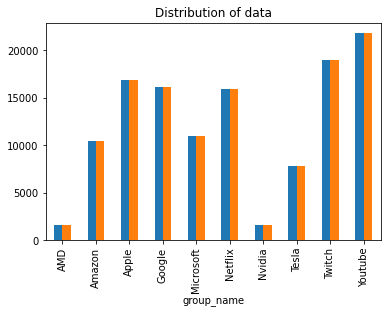

In [22]:
# Plotting the distribution for dataset.
ax = data.groupby('group_name').count().plot(kind='bar', title='Distribution of data',legend=False)
# Storing data in lists.
text, sentiment = list(data['text']), list(data['sentiment'])

In [23]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


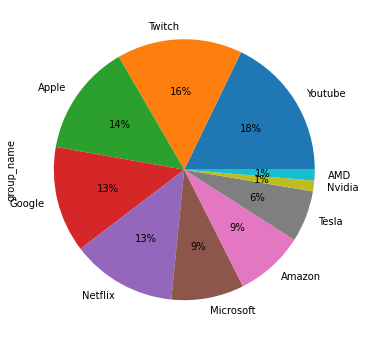

In [25]:
data.group_name.value_counts().plot(kind='pie', autopct='%1.0f%%')


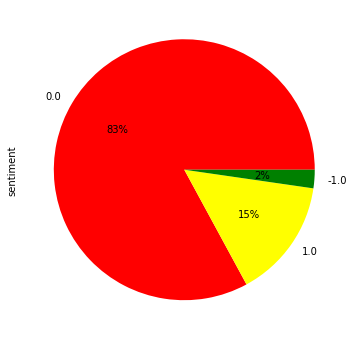

In [28]:
data.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])


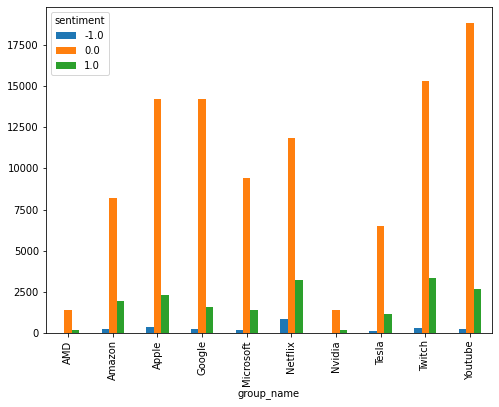

In [29]:
sentiment = data.groupby(['group_name', 'sentiment']).sentiment.count().unstack()
sentiment.plot(kind='bar')